<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/visualizacion_datos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#listas, diccionarios, directores, arreglos
import pandas as pd
#pandas manejo de data frame
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn librearia para realizar graficos a partir de data frames

In [ ]:
df = pd.read_csv("./minEducChile.csv")

In [ ]:
df.head()

,REGION,RURAL,TIPO_ENSE,EDAD_ALU,PROM_GRAL,ASISTENCIA,SITUACION_FINAL
0,9,0,BASICA,8,7.0,100,P
1,13,0,MEDIA_CH,16,6.7,100,P
2,15,0,MEDIA_CH,17,6.5,90,P
3,9,1,BASICA,9,6.4,100,P
4,13,0,BASICA,13,5.6,79,P


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REGION           987653 non-null  int64  
 1   RURAL            987653 non-null  int64  
 2   TIPO_ENSE        987653 non-null  object 
 3   EDAD_ALU         987653 non-null  int64  
 4   PROM_GRAL        987653 non-null  float64
 5   ASISTENCIA       987653 non-null  int64  
 6   SITUACION_FINAL  987653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 52.7+ MB


In [ ]:
df['TIPO_ENSE'] = df['TIPO_ENSE'].astype("category")
df['REGION'] = df['REGION'].astype("category")
df['RURAL'] = df['RURAL'].astype("category")
df['SITUACION_FINAL'] = df['SITUACION_FINAL'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  int64   
 1   RURAL            987653 non-null  int64   
 2   TIPO_ENSE        987653 non-null  category
 3   EDAD_ALU         987653 non-null  int64   
 4   PROM_GRAL        987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(2), float64(1), int64(4)
memory usage: 39.6 MB


In [ ]:
df= df[df['EDAD_ALU'] != 0] #inconsistencia

In [ ]:
#¿Cuántos estudiantes diferentes hay?
df['TIPO_ENSE'].value_counts()

BASICA      622755
MEDIA_CH    209403
MEDIA_TP     73235
Name: TIPO_ENSE, dtype: int64

<Axes: xlabel='TIPO_ENSE', ylabel='count'>

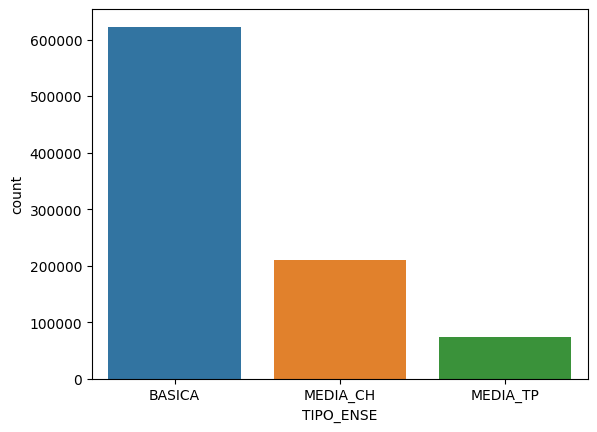

In [ ]:
sns.countplot(x=df["TIPO_ENSE"])

In [ ]:
#¿De qué región se tienen más estudiantes?
df['REGION'].value_counts()
#R/= Se tiene mas estudiantes de la region 13

13    375565
5      98335
6      53461
9      53132
8      52177
7      50921
10     50406
4      46921
2      36445
1      21974
3      18396
15     14391
16      9865
12      8693
14      8190
11      6521
Name: REGION, dtype: int64

<Axes: xlabel='ASISTENCIA', ylabel='Count'>

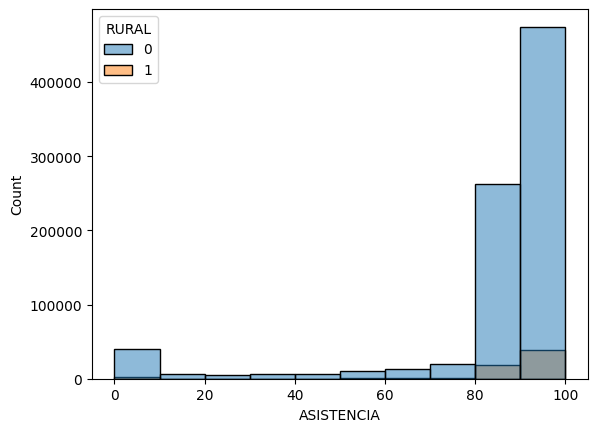

In [ ]:
#¿Cómo es la asistencia por urbano y rural, en general?
sns.histplot(data=df, x= df['ASISTENCIA'], bins=10, hue="RURAL")
#R= Todos los naranjas tienen buena asistencia
#R= En general todos los estudiantes tienen buena asistencia

In [ ]:
#¿Varía la asistencia conforme a la región?
pv = pd.pivot_table(df, index="REGION", values="ASISTENCIA", aggfunc=["mean"])
pv
#R/= La asistencia en promedio no varia considerablemente segun la region

,mean
,ASISTENCIA
REGION,
1,85.777146
2,88.659267
3,86.782888
4,87.559153
5,86.716998
6,88.305213
7,88.852065
8,88.648562


In [ ]:
#tabla pivote
pv = pd.pivot_table(df ,values="ASISTENCIA", aggfunc=["mean"], columns=['REGION'])
pv

mean                                                         \
REGION              1          2          3          4          5          6   
ASISTENCIA  85.777146  88.659267  86.782888  87.559153  86.716998  88.305213   

                                                                              \
REGION              7          8          9         10         11         12   
ASISTENCIA  88.852065  88.648562  88.766901  83.652879  79.004754  90.612677   

                                                      
REGION             13        14        15         16  
ASISTENCIA  82.705558  86.59475  87.95393  82.626356

In [ ]:
#¿Cómo se distribuyen las edades de estudiantes?
df['EDAD_ALU'].value_counts()

10    78061
12    77705
11    77061
7     76709
9     76659
13    75531
8     75224
14    73278
15    70866
16    70017
17    67256
6     58261
18    22409
19     5254
20      893
21      131
22       28
5        21
24        6
23        6
4         5
37        2
29        2
31        2
39        1
25        1
34        1
30        1
59        1
26        1
Name: EDAD_ALU, dtype: int64

<Axes: xlabel='EDAD_ALU', ylabel='Count'>

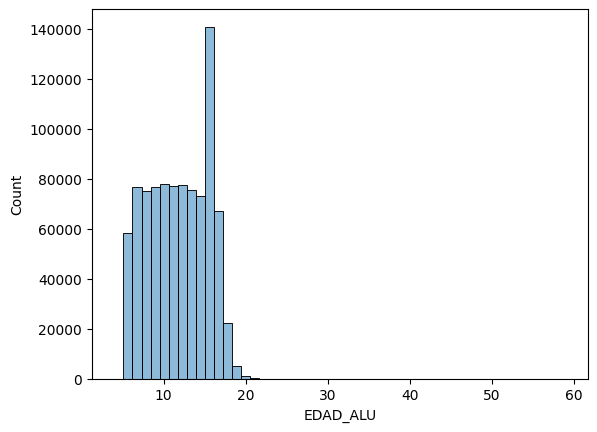

In [ ]:
sns.histplot(data=df, x= df['EDAD_ALU'], bins=50, alpha=0.5) #boxplot hacer

<Axes: ylabel='EDAD_ALU'>

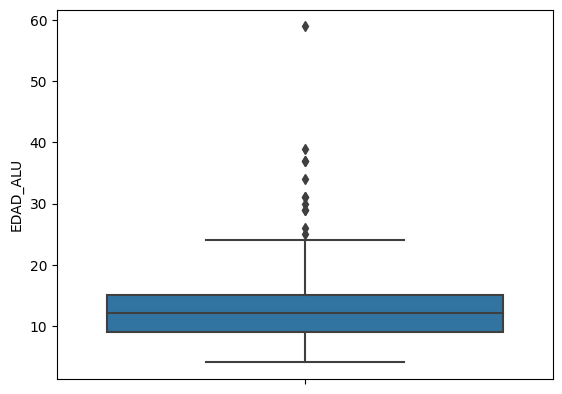

In [ ]:
sns.boxplot(data=df, y= df['EDAD_ALU'])

<Axes: xlabel='PROM_GRAL', ylabel='Count'>

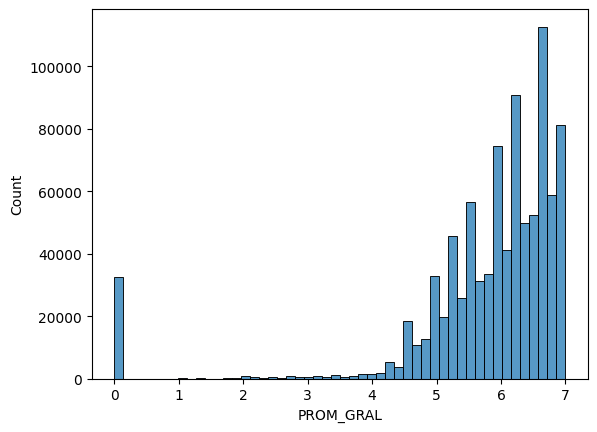

In [ ]:
#¿Cómo se distribuyen las notas de estudiantes?
sns.histplot(data=df, x= df['PROM_GRAL'], bins=50)
#R/ La mayoria de los estudiantes tienen notas superiores a 4 por lo cual aprovaron

In [ ]:
(df['PROM_GRAL'] >= 4.0).value_counts()


True     861725
False     43668
Name: PROM_GRAL, dtype: int64

In [ ]:
#¿Hay alguna incoherencia con los datos?

<Axes: xlabel='PROM_GRAL', ylabel='SITUACION_FINAL'>

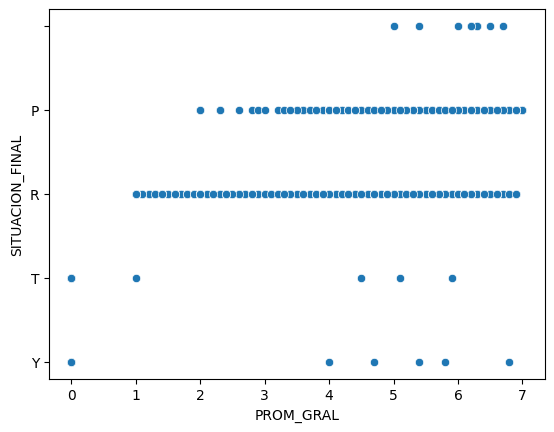

In [ ]:
sns.scatterplot(df, x="PROM_GRAL", y="SITUACION_FINAL")